In [1]:
%matplotlib inline

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import pandas as pd
from functools import reduce
from itertools import combinations
from keras.layers import Input

Using TensorFlow backend.


In [3]:
def transformCards(cards):
    T = np.zeros((12,3)).astype("int32")
    T[np.arange(12), cards.reshape(3*4)] = 1
    R = T.reshape(3,4,3)
    
    # L'ordre des cartes n'importe pas
    f = lambda p: reduce(np.bitwise_xor, [reduce(lambda a,i: a*R[i], c, 1) for c in combinations(range(3),p)])
    R1 = np.array([f(1),f(2),f(3)])
    
    # L'ordre des caractéristiques n'importe pas
    f = lambda p: reduce(np.bitwise_xor, [reduce(lambda a,i: a*R1[:,i], c, 1) for c in combinations(range(4),p)])
    R2 = np.array([f(1),f(2),f(3),f(4)])
        
    # L'ordre des one hot encoder n'importe pas
    f = lambda p: reduce(np.bitwise_xor, [reduce(lambda a,i: a*R2[:,:,i], c, 1) for c in combinations(range(3),p)])
    R3 = np.array([f(1),f(2),f(3)])
    return R3

In [4]:
def generateCard(): return np.random.randint(0,3,4).astype("int32")

In [5]:
def generateSet():
    A = generateCard()
    B = generateCard()
    return transformCards(np.array([A,B,(3-(A+B)%3)%3]).astype("int32"))

In [6]:
def isSet(cards):
    return (cards.sum(axis=0)%3).sum()==0

In [7]:
def generateNonSet():
    A = generateCard()
    B = generateCard()
    while True:
        C = generateCard()
        cards = np.array([A,B,C])
        if not isSet(cards):
            return transformCards(cards)

In [8]:
cards = generateNonSet()

In [9]:
cards

array([[[0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 0]],

       [[1, 0, 0],
        [1, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int32)

In [10]:
def generateDataset(N):
    Y = np.random.randint(0,2,N)
    X1 = np.array([generateSet() for _ in range(N)])
    X2 = np.array([generateNonSet() for _ in range(N)])
    return Y.reshape(N,1,1,1)*X1+(1-Y.reshape(N,1,1,1))*X2, Y

In [130]:
Xtrain, Ytrain = generateDataset(50)

In [131]:
Xtrain.shape

(50, 3, 4, 3)

In [132]:
Xtest, Ytest = generateDataset(1000)

In [133]:
model = Sequential()
model.add(Flatten())
model.add(Dense(3, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [134]:
hist = model.fit(Xtrain, Ytrain,
          batch_size=800,
          epochs=4000,
          verbose=0,
          validation_data=(Xtest, Ytest))

In [135]:
model.evaluate(Xtest, Ytest, verbose=0)

[0.16873646807670592, 0.909]

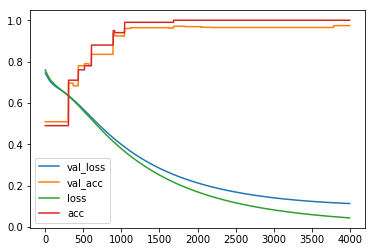

In [129]:
pd.DataFrame(hist.history).plot()

In [18]:
model.predict_classes(np.array([generateSet() for _ in range(10)]))

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [19]:
model.predict_classes(np.array([generateNonSet() for _ in range(10)]))

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [20]:
cards

array([[[0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 0]],

       [[1, 0, 0],
        [1, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int32)

In [21]:
R1 = cards

In [42]:
reduce(np.bitwise_xor, [reduce(lambda a,i: a*R1[:,i], c, 1) for c in combinations(range(4),4)])

array([[0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [147]:
f = lambda p: [reduce(lambda a,i: a+"*"+str(i), c, "") for c in combinations(range(3),p)]

In [151]:
f(2)

['*0*1', '*0*2', '*1*2']